Chapter 10

# 使用scikit-learn完成一元多项式回归
《线性代数》 | 鸢尾花书：数学不难

这段代码完整地实现了**一元八次多项式回归**的训练、预测与可视化过程，核心思想是在一维自变量 $x$ 上构造高阶多项式特征，并使用线性回归进行拟合。本质上，它利用了**特征升维 + 线性模型 = 非线性拟合能力增强**这一思路。我们从数学角度逐步解释每部分在做什么。

---

首先，代码读取了一组二维数据点，并将其分成输入 $x$ 和输出 $y$。形式如下：

$$
x = \begin{bmatrix} 1 \\ 2 \\ 4 \\ 5 \\ 6 \\ 7 \\ 8 \\ 9 \end{bmatrix}, \quad
y = \begin{bmatrix} 1 \\ 7 \\ 8 \\ 6 \\ 5 \\ 2 \\ 2 \\ 4 \end{bmatrix}
$$

---

### 一、特征构造（Polynomial Features）

设定多项式阶数为 $8$，通过 `PolynomialFeatures(degree=8)` 构造一个新的设计矩阵 $X_{\text{poly}}$，其每一行包含如下内容：

$$
X_{\text{poly}} = 
\begin{bmatrix}
1 & x & x^2 & x^3 & \dots & x^8
\end{bmatrix}
$$

例如，对于 $x = 2$，构造出的特征向量为：

$$
[1, 2, 4, 8, 16, 32, 64, 128, 256]
$$

因此，对于每个样本点，特征维度从原来的 $1$ 升到了 $9$。这一步的核心是将原始一维变量 $x$ 投射到高维的特征空间中，使模型具有拟合复杂曲线的能力。

---

### 二、模型训练（最小二乘线性回归）

使用 `LinearRegression()` 对构造出的特征进行拟合，目标是最小化平方误差，即求解以下最优化问题：

$$
\min_{\mathbf{b}} \| X_{\text{poly}} \cdot \mathbf{b} - y \|^2
$$

其解析解为正规方程形式：

$$
\mathbf{b} = (X^\top X)^{-1} X^\top y
$$

这里 $\mathbf{b}$ 是一个 $9 \times 1$ 的参数向量：

$$
\mathbf{b} = 
\begin{bmatrix}
b_0 \\ b_1 \\ b_2 \\ \dots \\ b_8
\end{bmatrix}
$$

回归预测值为：

$$
\hat{y} = X_{\text{poly}} \cdot \mathbf{b}
$$

---

### 三、预测与可视化

为了绘制回归曲线，代码在区间 $[0,10]$ 上生成了101个等距点，并用训练好的模型对这些点进行预测：

$$
\hat{y}_{\text{curve}} = \text{poly\_reg.predict}(X_{\text{array}})
$$

其中 $X_{\text{array}}$ 是新的输入点构造成的多项式特征。

最终图像中：

- 蓝色叉号为原始数据点 $(x_i, y_i)$；
- 红色叉号为预测点 $(x_i, \hat{y}_i)$；
- 黄色半透明线段连接真实值与预测值，表示残差；
- 红色曲线为八次多项式拟合出的函数图像。

---

### 四、模型表达式（回归公式）

回归系数保存在 `coef` 中，常数项为 `intercept`，它们共同构成了最终回归模型的表达式：

$$
\hat{y} = b_0 + b_1 x + b_2 x^2 + \cdots + b_8 x^8
$$

代码将其格式化为 LaTeX 形式，并打印如下公式：

```python
y = 0.518 + 3.733x - 3.695x^2 + 1.082x^3 - 0.123x^4 + ...
```

注意：由于模型是高阶多项式，它的表达能力极强，可以拟合各种非线性趋势，但也容易出现“过拟合”，即模型过度追踪训练数据，导致泛化能力下降。

---

### 总结

从数学视角看，这段代码实现了将一元非线性问题通过高阶多项式特征转化为线性模型，并通过最小二乘法拟合参数，从而完成对数据的建模。高阶多项式提供了强大的拟合能力，图像展示也很好地体现了拟合精度与模型复杂度之间的平衡关系。

## 初始化

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [5]:
data = np.array([[1, 1],
                 [2, 7],
                 [4, 8],
                 [5, 6],
                 [6, 5],
                 [7, 2],
                 [8, 2],
                 [9, 4]])
x = data[:,[0]]
y = data[:,[1]]

## 回归模型

In [7]:
x_array = np.linspace(0,10,101).reshape(-1,1)

In [8]:
degree_idx = 8
poly = PolynomialFeatures(degree = degree_idx)
X_poly = poly.fit_transform(x.reshape(-1, 1))

In [9]:
# 训练线性回归模型
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)
data_ = np.column_stack([x,y_poly_pred])

y_array_pred = poly_reg.predict(
                   poly.fit_transform(x_array))

## 可视化

(0.0, 10.0)

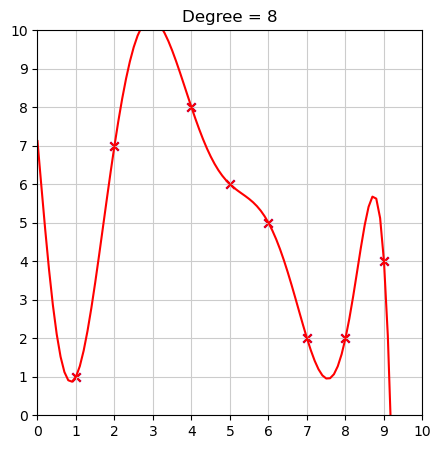

In [11]:
fig, ax = plt.subplots(figsize=(5,5))

# 绘制散点图
ax.scatter(x, y, marker = 'x', color = 'b')
ax.scatter(x, y_poly_pred, marker = 'x', color='r')

ax.plot(([i for (i,j) in data_], [i for (i,j) in data]),
        ([j for (i,j) in data_], [j for (i,j) in data]),
         c='#FFC000', alpha = 0.5)

ax.plot(x_array, y_array_pred, color='r')
ax.set_title('Degree = %d' % degree_idx)

# 提取参数
coef = poly_reg.coef_
intercept = poly_reg.intercept_
# 回归解析式

ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(11))
ax.set_xlim(0,10)
ax.grid(True, c = '0.8')
ax.set_ylim(0,10)

In [12]:
equation = '$y = {:.3f}'.format(intercept[0])
for j in range(1, len(coef[0])):
    equation += ' + {:.3f}x^{}'.format(coef[0][j], j)
equation += '$'
equation = equation.replace("+ -", "-")
print(equation)

$y = 7.123 -11.430x^1 -2.828x^2 + 15.342x^3 -9.463x^4 + 2.599x^5 -0.370x^6 + 0.027x^7 -0.001x^8$


作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  